## 1. Import necessary libraries

In [1]:
import nltk
nltk.download('words')
from nltk.corpus import words
import pandas as pd
import numpy as np
from scipy import stats
import re
import glob
import time
import seaborn
import requests
import pytrends
import datetime as dt
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from bs4 import BeautifulSoup, Comment
from selenium import webdriver
from urllib.parse import urlparse
import warnings

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'Cache-Control': 'no-cache',
    'Pragma': 'no-cache'
}

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\AshleyNguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [130]:
path = r'C:\Users\AshleyNguyen\Desktop\script\\'
df = pd.read_csv(path + 'zombie_companies_city.csv')
df.columns

Index(['prediction', 'InActive', 'LastFundingDate', 'LastFundingNo',
       'TotalFunding', 'LastFundingAmount', 'CompanyName', 'Website',
       'Description', 'CompanyOwnership', 'Industry Level 1',
       'Industry Level 2', 'Industry Level 3', 'City', 'Country',
       'FoundationYear'],
      dtype='object')

In [2]:
path = r'C:\Users\AshleyNguyen\Desktop\script\\'
df = pd.read_csv(path + 'zombie_companies_v2.csv')

# Display the DataFrame
df

C:\Users\AshleyNguyen\AppData\Local\Temp\ipykernel_20680\418261280.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + 'zombie_companies_v2.csv')


,Unnamed: 0,prediction,InActive,LastFundingDate,LastFundingNo,TotalFunding,LastFundingAmount,CompanyName,Website,Description,...,InActive_A3,NewDomain,NewWebsite,InActive_A4,CutOff,GGTrends_CutOff,zombie,City,Country,FoundationYear
0,0,0.666624,True,11/05/2000 0:00,1,5.000000,5.000000,EasyChem ( Social/Platform Software),NaN,Provides of online services for business entit...,...,False,NaN,NaN,False,28.534419,12.669940,False,Sioux City,United States,2000.0
1,1,0.653978,True,27/01/2009 0:00,2,6.000000,6.000000,BrightView Systems,www.brightview-sys.com,Provider of a production technology for photov...,...,False,appmaster,brightview-sys,True,63.111237,5.685127,False,Petah Tikva,Israel,2008.0
2,2,0.642127,True,18/12/2006 0:00,2,8.500000,2.500000,Industrious Kid,www.industriouskid.com,Operator of a social networking site. The comp...,...,False,hugedomains,industriouskid,True,28.534419,12.669940,False,Oakland,United States,2006.0
3,3,0.640157,True,01/01/2013 0:00,1,5.000000,5.000000,Widbook,www.widbook.com,Developer of an online collaborative ebook com...,...,False,widbook,widbook,False,28.534419,12.669940,False,Sao Paulo,Brazil,2012.0
4,4,0.639256,True,10/07/2000 0:00,1,5.830000,5.830000,Cargobiz.com,www.cargobiz.com,Operator of business-to-business e-commerce co...,...,False,hugedomains,cargobiz,True,28.534419,12.669940,False,Hamburg,Germany,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35283,35283,0.003425,False,14/07/2022 0:00,11,82.799928,39.999928,Mayvenn,shop.mayvenn.com,Retailer of online hair care products intended...,...,False,shop,shop,False,27.010213,14.060822,False,NaN,NaN,NaN
35284,35284,0.003409,False,02/02/2022 0:00,11,90.334820,55.515246,Propel (Financial Software),www.joinpropel.com,Developer of a mobile finance platform designe...,...,False,joinpropel,joinpropel,False,28.534419,12.669940,False,NaN,NaN,NaN
35285,35285,0.003312,False,01/08/2022 0:00,11,377.920116,200.000000,Andela,www.andela.com,Operator of a global talent network intended t...,...,True,andela,andela,False,30.867677,11.144148,False,NaN,NaN,NaN
35286,35286,0.003263,False,28/02/2022 0:00,10,94.591082,50.000003,Qventus,www.qventus.com,Developer of hospital management software desi...,...,True,qventus,qventus,False,26.055167,8.277183,False,NaN,NaN,NaN


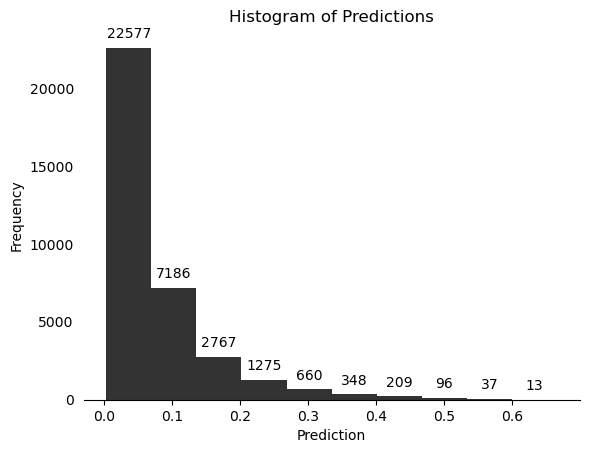

In [132]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['prediction'], color='#333333')  # Soft black color

# Removing the spines (line outside the graph)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Removing the ticks on the left and top sides of the graph
plt.tick_params(left=False, top=False)

# Adding labels and title
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions')

# Annotating the value on each bar
n, bins, patches = plt.hist(df['prediction'], color='#333333')
for count, patch in zip(n, patches):
    plt.annotate(str(int(count)), xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Displaying the histogram
plt.show()


## 2. Definition of Zombie companies

Inactive or no growth potential companies but labelled active in the dataset.

**Filter Layers**

**1. Use existing features in the dataset**

*A1: Screen the Company Ownership*

If the Company Ownership is Acquired/Merged, Acquired/Merged (Operating Subsidiary), Out of Business, assign InActive as True.

*A2: Screen Last Funding Date*

If the company receives funding in the last year, there's a high chance they are stil working on their business plan and have potential to grow.

**2. Get external features**

*A3: Google Trends search*

Use the pytrends library to get the number of Google Search for the keyword.
The keyword is extracted from the company's website. If the name of their website is unique (not an English word), then I use that as the keyword in Google Trend search. If the name of their website is in the English dictionary (check this using nltk library), I use the website name with the domain extension eg. cow.net or joy.com.
The output is for each company there are 52 columns with the number of Google searches of their keyword in the last 52 weeks.

*A4: Website domain activeness*

Use requests library to check if their website redirects to a new domain. If the website redirects to a new domain, it is likely that the company has been acquired or shut down. Therefore, we look for companies whose website does not redirect.
The output of this feature is the end website where we can compare that with the website we have in our dataset.

*A5: External databases:*

Filter down the ones that are confirmed 'closed' on Crunchbase, 'Acquired/Merged' on Pitchbook and 'Deadpooled' on Tracxn.

### 1 - Existing Features

#### A1: Company Ownership

In [4]:
### A1: Screening Company Ownership feature
df['CompanyOwnership'].value_counts()

Privately Held (backing)                  22933
Acquired/Merged                            2601
Acquired/Merged (Operating Subsidiary)     2360
Out of Business                            1561
Publicly Held                               704
In IPO Registration                          41
Name: CompanyOwnership, dtype: int64

In [5]:
df['InActive_A1'] = df['InActive']

# Assign True to 'InActive_A1' where 'InActive' is False and 'CompanyOwnership' is 'Out of Business'
df.loc[(df['InActive'] == False) & (df['CompanyOwnership'] == 'Out of Business'), 'InActive_A1'] = True

# Assign True to 'InActive_A1' where 'InActive' is False and 'CompanyOwnership' is 'In IPO Registration'
df.loc[(df['InActive'] == False) & (df['CompanyOwnership'] == 'In IPO Registration'), 'InActive_A1'] = True

# Assign True to 'InActive_A1' where 'InActive' is False and 'CompanyOwnership' is 'Acquired/Merged'
df.loc[(df['InActive'] == False) & (df['CompanyOwnership'] == 'Acquired/Merged'), 'InActive_A1'] = True

# Assign True to 'InActive_A1' where 'InActive' is False and 'CompanyOwnership' is 'Acquired/Merged (Operating Subsidiary)'
df.loc[(df['InActive'] == False) & (df['CompanyOwnership'] == 'Acquired/Merged (Operating Subsidiary)'), 'InActive_A1'] = True

# Assign True to 'InActive_A1' where 'InActive' is False and 'CompanyOwnership' is 'Publicly Held'
df.loc[(df['InActive'] == False) & (df['CompanyOwnership'] == 'Publicly Held'), 'InActive_A1'] = True

In [6]:
print("Number of InActive companies in the dataset before A1")
print(len(df[df['InActive'] == False]))
print("Number of InActive companies in the dataset after A1 (Company Ownership)")
print(len(df[(df['InActive'] == False) & (df['InActive_A1'] == False)]))

Number of InActive companies in the dataset before A1
32660
Number of InActive companies in the dataset after A1 (Company Ownership)
26893


#### A2: Burn Rate

Monthly Burn Rate is calculated from (Total Funding - Last Funding Amount) / (Last Funding Date - Foundation Year).


Once we have the Burn Rate for each company, calculate if they have enough cash to burn until now. (Last Funding Amount - Burn Rate x (Now - Last Funding Date)) > 0

In [8]:
df['LastFundingDate'] = pd.to_datetime(df['LastFundingDate'], format='%d/%m/%Y %H:%M')

In [13]:
# df['FoundationYear'] = df['FoundationYear'].fillna(2015).astype(int)

# # Convert FoundationYear to integer type
# df['FoundationYear'] = df['FoundationYear'].astype(int)

# # Convert FoundationYear to datetime with first day of the year
# df['FoundationYear'] = pd.to_datetime(df['FoundationYear'], format='%Y')

# Convert LastFundingDate to periods
df['LastFundingPeriod'] = df['LastFundingDate'].dt.to_period('M')

# Convert FoundationYear to periods
df['FoundationPeriod'] = df['FoundationYear'].dt.to_period('M')

# Calculate the number of months between LastFundingDate and FoundationYear
df['MonthsSinceFoundation'] = df['LastFundingPeriod'].astype(int) - df['FoundationPeriod'].astype(int)

C:\Users\AshleyNguyen\AppData\Local\Temp\ipykernel_20680\1052269839.py:16: FutureWarning: The behavior of .astype from period[M] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  df['MonthsSinceFoundation'] = df['LastFundingPeriod'].astype(int) - df['FoundationPeriod'].astype(int)


In [15]:
df['MonthlyBurnRate'] = (df['TotalFunding'] - df['LastFundingAmount']) / df['MonthsSinceFoundation']

In [19]:
# Get the current date and time
current_date = datetime.now()

# Calculate the number of months between the current date and LastFundingDate
df['MonthsSinceLastFunding'] = (current_date.year - df['LastFundingDate'].dt.year) * 12 + (current_date.month - df['LastFundingDate'].dt.month)

In [22]:
df.loc[df['LastFundingNo'] > 1, 'RemainingCash'] = df['LastFundingAmount'] - df['MonthlyBurnRate'] * df['MonthsSinceLastFunding']

In [28]:
grouped_df = df[df['LastFundingNo'] > 1].groupby(['Industry Level 1'])['MonthlyBurnRate'].median().reset_index()
grouped_df

,Industry Level 1,MonthlyBurnRate
0,Business Products and Services (B2B),0.067356
1,Consumer Products and Services (B2C),0.073768
2,Energy,0.070073
3,Financial Services,0.122660
4,Healthcare,0.087103
5,Information Technology,0.075722
6,Materials and Resources,0.079749


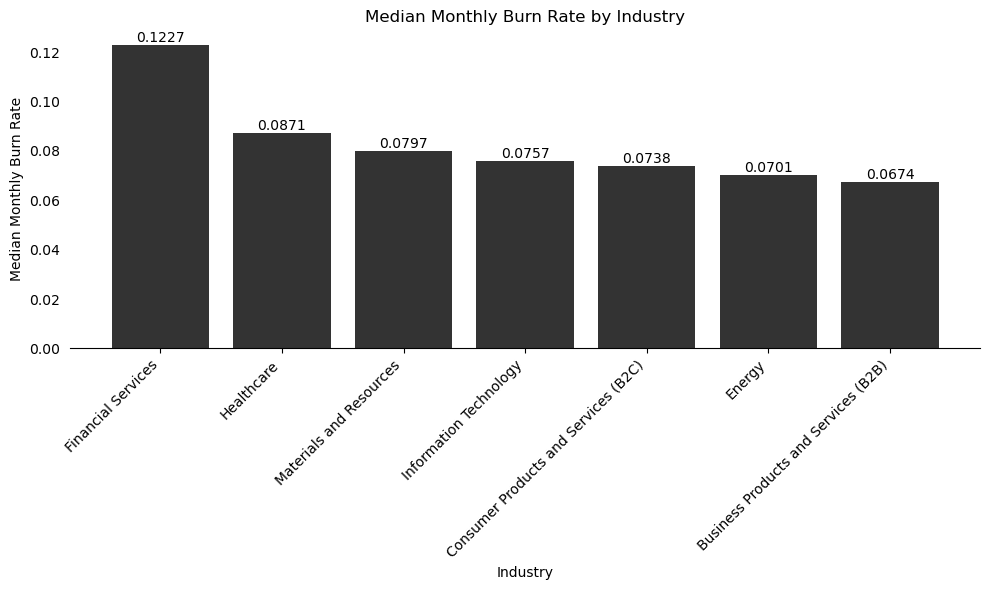

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by 'MonthlyBurnRate' in descending order
grouped_df = grouped_df.sort_values('MonthlyBurnRate', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(grouped_df)), grouped_df['MonthlyBurnRate'], color='#333333')

# Annotate the values above each bar
for i, value in enumerate(grouped_df['MonthlyBurnRate']):
    plt.text(i, value, str(round(value, 4)), ha='center', va='bottom')

# Remove the spines (line outside the graph)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Remove the ticks on the left and top sides of the graph
plt.tick_params(left=False, top=False)

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Median Monthly Burn Rate')
plt.title('Median Monthly Burn Rate by Industry')

# Rotate x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')

# Set the x-axis tick positions and labels
plt.xticks(np.arange(len(grouped_df)), grouped_df['Industry Level 1'])

# Adjust the position of the x-axis tick labels
plt.subplots_adjust(bottom=0.2)

# Display the chart
plt.tight_layout()
plt.show()


In [29]:
# Create a dictionary mapping 'Industry Level 1' to the mean 'TotalFunding' where 'InActive' is False
burn_rate_dict = grouped_df.set_index('Industry Level 1')['MonthlyBurnRate'].to_dict()

# Assign the mean 'TotalFunding' to 'cutoff' where 'Industry Level 2' matches
df.loc[df['LastFundingNo'] <= 1, 'MonthlyBurnRate'] = df.apply(lambda row: burn_rate_dict[row['Industry Level 1']] if row['Industry Level 1'] in burn_rate_dict else 0, axis=1)

In [30]:
df.loc[df['LastFundingNo'] <= 1, 'RemainingCash'] = df['LastFundingAmount'] - df['MonthlyBurnRate'] * df['MonthsSinceLastFunding']

In [32]:
df[(df['RemainingCash'] < 0) & (df['InActive_A1'] == False)]

,Unnamed: 0,prediction,InActive,LastFundingDate,LastFundingNo,TotalFunding,LastFundingAmount,CompanyName,Website,Description,...,zombie,City,Country,FoundationYear,LastFundingPeriod,FoundationPeriod,MonthsSinceFoundation,MonthlyBurnRate,MonthsSinceLastFunding,RemainingCash
7,7,0.620771,False,2005-06-06 00:00:00,1,6.000000,6.000000,Leverage Software,www.leveragesoftware.com,Provider of an online community software. The ...,...,False,San Francisco,United States,2003-01-01,2005-06,2003-01,29,0.075722,216,-10.355922
15,15,0.593170,False,2011-03-01 00:00:00,1,5.460000,5.460000,Youmag France,www.youmag.com,Provider of a social digital magazines. The co...,...,True,Paris,France,2011-01-01,2011-03,2011-01,2,0.073768,147,-5.383910
17,17,0.588014,False,2008-09-30 00:00:00,5,9.710000,0.500000,VisualCV,www.visualcv.com,Developer of resume & CV-building platform int...,...,False,Burnaby,Canada,2007-01-01,2008-09,2007-01,20,0.460500,177,-81.008500
23,23,0.577514,False,2000-08-23 00:00:00,1,8.100000,8.100000,Brainhunter (acquired 2003),Brainhunter.com,Provider of online job search platform. The co...,...,True,Toronto,Canada,2000-01-01,2000-08,2000-01,7,0.075722,274,-12.647790
32,32,0.557931,False,2023-01-23 00:00:00,2,14.495748,0.499999,Rayze,www.rayzeapp.com,Developer of a social media platform designed ...,...,False,Conshohocken,United States,2020-01-01,2023-01,2020-01,36,0.388771,5,-1.443855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34738,34738,0.005391,False,2019-08-22 00:00:00,8,118.400768,49.999802,SpotHero,www.spothero.com,Developer of a mobile parking application desi...,...,False,Burlingame,United States,2015-01-01,2019-08,2015-01,55,1.243654,46,-7.208279
34774,34774,0.005274,False,2021-10-20 00:00:00,11,417.800135,106.000000,Benchling,www.benchling.com,Developer of a lab collaboration platform desi...,...,False,Vilnius,Lithuania,2017-01-01,2021-10,2017-01,57,5.470178,20,-3.403556
34856,34856,0.005061,False,2021-07-21 00:00:00,13,392.909822,66.947996,BlackBuck,www.blackbuck.com,Developer of an online fleet management platfo...,...,False,San Mateo,United States,2013-01-01,2021-07,2013-01,102,3.195704,23,-6.553200
35169,35169,0.004124,False,2015-11-19 00:00:00,7,164.796992,90.725001,Dollar Shave Club,www.dollarshaveclub.com,Operator of a personal products e-commerce pla...,...,False,NaN,NaN,2015-01-01,2015-11,2015-01,10,7.407199,91,-583.330117


In [97]:
df['InActive_A2'] = df['InActive_A1']
# Filter dates for 2022 and 2023
mask = ((df['LastFundingDate'].dt.year == 2022) | (df['LastFundingDate'].dt.year == 2023))
df.loc[mask, 'InActive_A2'] = True

In [98]:
print("Number of InActive companies in the dataset after A1 (Company Ownership)")
print(len(df[df['InActive_A1'] == False]))
print("Number of InActive companies in the dataset after A1 (Company Ownership) and A2 (Last Funding Date)")
print(len(df[(df['RemainingCash'] < 0) & (df['InActive_A1'] == False) & (df['InActive_A2'] == False)]))

Number of InActive companies in the dataset after A1 (Company Ownership)
26893
Number of InActive companies in the dataset after A1 (Company Ownership) and A2 (Last Funding Date)
3989


### 2 - External Features

#### A3: Google Trends search

Merged the Google Trends csv with the main dataset through keyword column

In [70]:
directory = r'C:\Users\AshleyNguyen\Desktop\script\interest_df\\'

dataframes = pd.DataFrame()

csv_files = glob.glob(directory + 'interest_df*.csv')

for file in csv_files:
    interest_df = pd.read_csv(file)
    dataframes = pd.concat([dataframes, interest_df], axis = 0)

In [71]:
# Rename column
dataframes = dataframes.drop(dataframes.columns[53], axis=1)
dataframes.rename(columns={'Unnamed: 0': 'keyword'}, inplace=True)
# Drop duplicates
dataframes = dataframes[~dataframes['keyword'].duplicated()]
dataframes

,keyword,2022-06-05,2022-06-12,2022-06-19,2022-06-26,2022-07-03,2022-07-10,2022-07-17,2022-07-24,2022-07-31,...,2023-04-09,2023-04-16,2023-04-23,2023-04-30,2023-05-07,2023-05-14,2023-05-21,2023-05-28,2023-06-04,2023-06-11
0,widbook,0.0,0.0,0,10,0,0,0,10,0,...,0,15,13,0,0,0,0,100,NaN,NaN
1,modelinia,0.0,0.0,0,57,0,0,0,54,0,...,0,0,0,34,0,37,0,0,NaN,NaN
2,uplister,0.0,0.0,0,0,0,0,0,0,0,...,55,0,0,0,0,0,0,0,NaN,NaN
3,smalltown,55.0,48.0,58,52,55,57,38,50,46,...,49,57,58,49,52,46,43,59,NaN,NaN
4,kula.com,0.0,0.0,0,0,29,12,27,0,0,...,0,0,0,0,0,0,15,100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,tipbit,NaN,0.0,0,0,0,45,0,100,0,...,0,0,0,0,0,0,0,60,NaN,NaN
1109,realsavvy,NaN,0.0,0,0,0,0,0,0,0,...,0,86,0,0,0,0,0,0,NaN,NaN
1110,coconala,NaN,100.0,42,40,0,35,16,28,46,...,33,50,67,13,19,36,27,18,NaN,NaN
1111,aqualiner,NaN,40.0,100,87,0,55,43,0,0,...,0,39,0,38,0,0,75,0,NaN,NaN


In [73]:
def strip_www(domain):
    if type(domain) == str:
        if domain.startswith("ww"):
            domain = domain.split('.')[1]
        else:
            domain = domain.split('.')[0]
    return domain

def find_keyword(s):
    if type(s) == str:
        if strip_www(s) in words.words():
            keyword = re.sub('^w{0,3}\d*\.','',s)
        else:
            keyword = strip_www(s)
    else:
        keyword = ''
    return keyword

In [18]:
dataframes['average'] = dataframes.iloc[:, 1:].mean(axis=1)
dataframes

,keyword,2022-06-05,2022-06-12,2022-06-19,2022-06-26,2022-07-03,2022-07-10,2022-07-17,2022-07-24,2022-07-31,...,2023-04-16,2023-04-23,2023-04-30,2023-05-07,2023-05-14,2023-05-21,2023-05-28,2023-06-04,2023-06-11,average
0,widbook,0.0,0.0,0,10,0,0,0,10,0,...,15,13,0,0,0,0,100,NaN,NaN,4.788462
1,modelinia,0.0,0.0,0,57,0,0,0,54,0,...,0,0,34,0,37,0,0,NaN,NaN,10.961538
2,uplister,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,9.288462
3,smalltown,55.0,48.0,58,52,55,57,38,50,46,...,57,58,49,52,46,43,59,NaN,NaN,50.692308
4,kula.com,0.0,0.0,0,0,29,12,27,0,0,...,0,0,0,0,0,15,100,NaN,NaN,4.576923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,tipbit,NaN,0.0,0,0,0,45,0,100,0,...,0,0,0,0,0,0,60,NaN,NaN,10.372549
1109,realsavvy,NaN,0.0,0,0,0,0,0,0,0,...,86,0,0,0,0,0,0,NaN,NaN,12.666667
1110,coconala,NaN,100.0,42,40,0,35,16,28,46,...,50,67,13,19,36,27,18,NaN,NaN,30.901961
1111,aqualiner,NaN,40.0,100,87,0,55,43,0,0,...,39,0,38,0,0,75,0,NaN,NaN,23.313725


In [19]:
df.columns

Index(['prediction', 'InActive', 'LastFundingDate', 'LastFundingNo',
       'TotalFunding', 'LastFundingAmount', 'CompanyName', 'Website',
       'Description', 'CompanyOwnership', 'Industry Level 1',
       'Industry Level 2', 'Industry Level 3', 'Problem', 'Note',
       'NewDomain_x', 'NewDomain_y', 'InActive_A1', 'InActive_A2', 'keyword'],
      dtype='object')

In [24]:
merged_df = df.merge(dataframes[['keyword','average']], on='keyword', how='outer')
merged_df['average'].fillna(0, inplace=True)
merged_df.loc[merged_df['Website'].isna(), 'average'] = 0

In [25]:
merged_df

,prediction,InActive,LastFundingDate,LastFundingNo,TotalFunding,LastFundingAmount,CompanyName,Website,Description,CompanyOwnership,...,Industry Level 2,Industry Level 3,Problem,Note,NewDomain_x,NewDomain_y,InActive_A1,InActive_A2,keyword,average
0,0.666624,True,2000-05-11,1.0,5.000000,5.000000,EasyChem ( Social/Platform Software),NaN,Provides of online services for business entit...,NaN,...,Software,Social/Platform Software,NaN,NaN,NaN,NaN,True,True,,0.000000
1,0.607626,True,2008-09-16,2.0,12.000000,5.000000,ROBOTGALAXY,NaN,Provider of online robot community. The compan...,Out of Business,...,Software,Social/Platform Software,NaN,NaN,NaN,NaN,True,True,,0.000000
2,0.605390,True,2007-09-21,1.0,10.000000,10.000000,MatchMine,NaN,Provider of media discovery platform. The comp...,NaN,...,Media,"Movies, Music and Entertainment",NaN,NaN,NaN,NaN,True,True,,0.000000
3,0.581682,True,2007-12-19,2.0,7.320000,7.320000,Zoomio,NaN,Provider of marketing automation and email mar...,NaN,...,Software,Social/Platform Software,NaN,NaN,NaN,NaN,True,True,,0.000000
4,0.573415,True,2005-10-17,1.0,5.000000,5.000000,Jambo,NaN,Provider of net-to-phone software for connecti...,NaN,...,Software,Application Software,NaN,NaN,NaN,NaN,True,True,,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35284,0.003409,False,2022-02-02,11.0,90.334820,55.515246,Propel (Financial Software),www.joinpropel.com,Developer of a mobile finance platform designe...,Privately Held (backing),...,Software,Financial Software,NaN,NaN,www.joinpropel.com,www.joinpropel.com,False,True,joinpropel,0.000000
35285,0.003312,False,2022-08-01,11.0,377.920116,200.000000,Andela,www.andela.com,Operator of a global talent network intended t...,Privately Held (backing),...,Commercial Services,Human Capital Services,NaN,NaN,andela.com,andela.com,False,True,andela,66.098039
35286,0.003263,False,2022-02-28,10.0,94.591082,50.000003,Qventus,www.qventus.com,Developer of hospital management software desi...,Privately Held (backing),...,Healthcare Technology Systems,Enterprise Systems (Healthcare),NaN,NaN,qventus.com,qventus.com,False,True,qventus,16.686275
35287,0.003051,False,2022-01-25,9.0,271.824073,250.000000,Good Glamm Group,www.goodglamm.com,Operator of an online beauty products marketpl...,Privately Held (backing),...,Consumer Non-Durables,Personal Products,NaN,NaN,goodglamm.com,goodglamm.com,False,True,goodglamm,10.372549


In [26]:
merged_df = merged_df[:-1]


In [47]:
df.to_csv('test_redirect_keyword.csv', index=False)

After merging 

In [46]:
grouped_df = df.groupby(['Industry Level 1', 'InActive'])['average'].mean().reset_index()
grouped_df

,Industry Level 1,InActive,average
0,Business Products and Services (B2B),False,17.755773
1,Business Products and Services (B2B),True,11.144148
2,Consumer Products and Services (B2C),False,24.744322
3,Consumer Products and Services (B2C),True,14.060822
4,Energy,False,14.029958
5,Energy,True,5.685127
6,Financial Services,False,22.085343
7,Financial Services,True,16.543263
8,Healthcare,False,13.755249
9,Healthcare,True,8.277183


In [47]:
# Create a dictionary mapping 'Industry Level 2' to the mean 'TotalFunding' where 'InActive' is False
mean_funding_dict = grouped_df.loc[grouped_df['InActive'] == True].set_index('Industry Level 1')['average'].to_dict()

# Assign the mean 'TotalFunding' to 'cutoff' where 'Industry Level 2' matches
df['GGTrends_CutOff'] = df.apply(lambda row: mean_funding_dict[row['Industry Level 1']] if row['Industry Level 1'] in mean_funding_dict else 0, axis=1)


In [99]:
print("Number of InActive companies in the dataset after A1 (Company Ownership)")
print(len(df[df['InActive_A1'] == False]))
print("Number of InActive companies after A1 (Company Ownership) and A2 (Burn Rate)")
print(len(df[(df['InActive_A1'] == False) & (df['RemainingCash'] < 0)]))
print("Number of InActive companies after A1 (Company Ownership), A2 (Burn Rate), and A3 (Google Trends search)")
print(len(df[(df['InActive_A1'] == False)
             & (df['RemainingCash'] < 0)
             &(df['average'] < df['GGTrends_CutOff'])
             & (df['InActive_A2'] == False)]))

Number of InActive companies in the dataset after A1 (Company Ownership)
26893
Number of InActive companies after A1 (Company Ownership) and A2 (Burn Rate)
5170
Number of InActive companies after A1 (Company Ownership), A2 (Burn Rate), and A3 (Google Trends search)
2047


#### A4: Web Domain Activeness

If the company's website does not redirect => suspicious of being zombie

In [49]:
def strip_www(domain):
    if type(domain) == str:
        if domain.startswith("ww"):
            domain = domain.split('.')[1]
        else:
            domain = domain.split('.')[0]
    return domain

def find_keyword(s):
    if type(s) == str:
        if strip_www(s) in words.words():
            keyword = re.sub('^w{0,3}\d*\.','',s)
        else:
            keyword = strip_www(s)
    else:
        keyword = ''
    return keyword

In [ ]:
# Preprocess New Domain to compare
df['NewDomain'] = df['NewDomain_x']
df['NewDomain'] = df['NewDomain'].fillna('')
df['NewDomain'] = df['NewDomain'].apply(strip_www)
df['NewDomain'] = df['NewDomain'].apply(str.lower)

In [ ]:
# Preprocess Website to compare
df['NewWebsite'] = df['Website']
df['NewWebsite'] = df['NewWebsite'].fillna('')
df['NewWebsite'] = df['NewWebsite'].apply(strip_www)
df['NewWebsite'] = df['NewWebsite'].apply(str.lower)

In [ ]:
df['InActive_A4'] = df['NewWebsite'] == df['NewDomain']
df['InActive_A4'] = ~df['InActive_A4']

In [41]:
df['NewDomain'].value_counts()

               5860
hugedomains     232
corp             52
oracle           33
en               25
               ... 
xti               1
pixelynx          1
joinhoney         1
braingames        1
goodglamm         1
Name: NewDomain, Length: 27226, dtype: int64

In [100]:
print("Number of InActive companies in the dataset after A1 (Company Ownership)")
print(len(df[df['InActive_A1'] == False]))
print("Number of InActive companies after A1 (Company Ownership) and A2 (Burn Rate)")
print(len(df[(df['InActive_A1'] == False) & (df['RemainingCash'] < 0)]))
print("Number of InActive companies after A1 (Company Ownership), A2 (Burn Rate), and A3 (Google Trends search)")
print(len(df[(df['InActive_A1'] == False)
             & (df['RemainingCash'] < 0)
             &(df['average'] < df['GGTrends_CutOff'])]))
print("After A1 (Company Ownership), A2 (Last Funding Date), A3 (Google Trends search), and A4 (Web Domain Activeness)")
print(len(df[(df['InActive_A1'] == False)
             & (df['RemainingCash'] < 0)
             &(df['average'] < df['GGTrends_CutOff'])
             &(df['InActive_A4'] == False)
            & (df['InActive_A2'] == False)]))

Number of InActive companies in the dataset after A1 (Company Ownership)
26893
Number of InActive companies after A1 (Company Ownership) and A2 (Burn Rate)
5170
Number of InActive companies after A1 (Company Ownership), A2 (Burn Rate), and A3 (Google Trends search)
2600
After A1 (Company Ownership), A2 (Last Funding Date), A3 (Google Trends search), and A4 (Web Domain Activeness)
1589


We are mainly concerned with SaaS companies so I will also filter off the companies without a website listed

In [101]:
test = df[(df['InActive_A1'] == False)
             & (df['RemainingCash'] < 0)
             &(df['average'] < df['GGTrends_CutOff'])
             &(df['InActive_A4'] == False)
            & (df['InActive_A2'] == False)]

In [102]:
print("Number of companies in the suspected zombie list without websites")
print(test['Website'].isna().sum())

Number of companies in the suspected zombie list without websites
95


In [103]:
# Eliminate companies without websites
test = test[~test['Website'].isna()]

In [104]:
print("Number of companies in the zombie list after filtering from A1234")
print(len(test))

Number of companies in the zombie list after filtering from A1234
1494


#### A5: Cross-check with other databases

If one of these databases claimed that the company is 'Closed', 'Acquired/Merged', or 'Deadpooled', the company is eliminated from the list.

##### a. Crunchbase

In [141]:
path = r'C:\Users\AshleyNguyen\Desktop\script\crunchbase\\'
cb = pd.read_csv(path+'crunchbase.csv')
cb.shape

(5146, 15)

In [142]:
set_test = set(test['CompanyName'])
set_cb = set(cb['Organization Name'])
common_values = set_test.intersection(set_cb)
len(common_values)

836

In [107]:
merged_df_test = test.merge(cb, on = 'Website', how = 'left')

In [108]:
merged_df_test

,Unnamed: 0_x,prediction,InActive,LastFundingDate,LastFundingNo,TotalFunding,LastFundingAmount,CompanyName,Website,Description_x,...,Description_y,CB Rank (Company),Monthly Visits,Operating Status,Closed Date,Twitter,LinkedIn,Founders,Acquisition Status,Acquired by
0,15,0.593170,False,2011-03-01 00:00:00,1,5.460000,5.460000,Youmag France,www.youmag.com,Provider of a social digital magazines. The co...,...,youmag is a digital magazine that revamps your...,"2,056,346",—,Active,—,View on Twitter,—,"Antoine Leveque, Guillaume Multrier",—,—
1,23,0.577514,False,2000-08-23 00:00:00,1,8.100000,8.100000,Brainhunter (acquired 2003),Brainhunter.com,Provider of online job search platform. The co...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,0.530599,False,2011-04-23 00:00:00,4,6.570000,0.270000,Instinctiv,www.instinctiv.com,Provider of iPhone application for streamlinin...,...,Instinctiv is a music management and discovery...,"682,188",—,Active,—,View on Twitter,—,"Justin Smithline, Peter Brodsky",Was Acquired,SoundCloud
3,74,0.515617,False,2015-06-08 00:00:00,3,8.190000,0.150000,MobSoc Media,www.mobsocmedia.com,Developer of social applications for creating ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96,0.498849,False,2011-08-05 00:00:00,1,5.800000,5.800000,Quark Games,www.quarkgames.com,Developer of web based and mobile games. The c...,...,Quark games is a company that develops games f...,"468,568",—,Closed,—,View on Twitter,—,"Brad Moss, Charles Ju, Eric Liaw, Eric Peng, H...",—,—
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,32367,0.010910,False,2021-07-21 00:00:00,10,64.589990,32.099998,b.well,www.icanbwell.com,Developer of a digital health engagement platf...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1491,32463,0.010677,False,2021-09-07 00:00:00,10,114.103012,30.000000,aPriori,www.apriori.com,Developer of a product cost management platfor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1492,33065,0.009281,False,2019-01-01 00:00:00,11,11.949963,7.000000,Banyan Technology,www.banyantechnology.com,Developer of logistics management platform des...,...,Banyan Technology creates and maintains direct...,"94,823","3,104",Active,—,View on Twitter,View on LinkedIn,"Jim Walborn, Lance Healy",—,—
1493,33183,0.009026,False,2021-09-24 00:00:00,9,208.220001,24.999998,Sift,www.sift.com,Developer of a machine-learning-based fraud de...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
print(merged_df_test['Acquisition Status'].value_counts())
print(merged_df_test['Operating Status'].value_counts())

—                                  374
Was Acquired                        55
Made Acquisitions                   48
Made Acquisitions, Was Acquired      7
Name: Acquisition Status, dtype: int64
Active    467
Closed     17
Name: Operating Status, dtype: int64


In [110]:
merged_df_test['Monthly Visits'] = merged_df_test['Monthly Visits'].str.replace(',', '')
merged_df_test['Monthly Visits'] = pd.to_numeric(merged_df_test['Monthly Visits'], errors='coerce')
merged_df_test['Monthly Visits'] = merged_df_test['Monthly Visits'].fillna(0)

In [111]:
zombie = merged_df_test[(merged_df_test['Acquisition Status'] != 'Was Acquired') &
                        (merged_df_test['Acquisition Status'] != 'Made Acquisitions, Was Acquired') &
                        (merged_df_test['Operating Status'] != 'Closed') &
                        (merged_df_test['Monthly Visits'] == 0)]

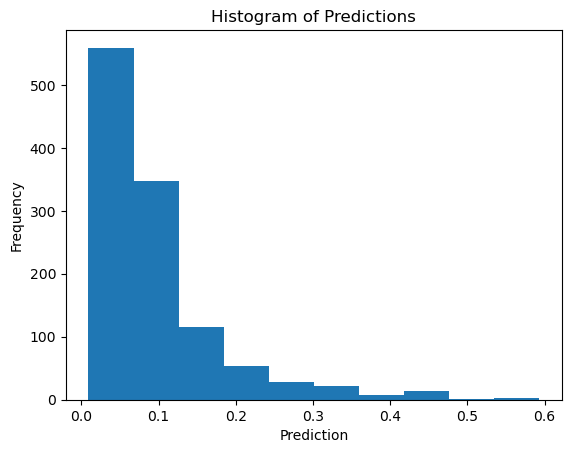

In [112]:
# Plotting the histogram
plt.hist(zombie['prediction'])

# Adding labels and title
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions')

# Displaying the histogram
plt.show()

In [113]:
print("Number of companies w prediction < 0.1:", len(zombie[zombie['prediction'] < 0.1]))
print("Number of companies w prediction > 0.1:", len(zombie[zombie['prediction'] > 0.1]))

Number of companies w prediction < 0.1: 770
Number of companies w prediction > 0.1: 379


In [114]:
print("After A1234 and eliminating the companies without listed websites")
print(len(test))
print("After Eliminating companies with Operating Status as Closed or Was Acquired on Crunchbase")
print("or has no Monthly Visits to the listed website")
print(len(zombie))

After A1234 and eliminating the companies without listed websites
1494
After Eliminating companies with Operating Status as Closed or Was Acquired on Crunchbase
or has no Monthly Visits to the listed website
1149


In [115]:
path = r'C:\Users\AshleyNguyen\Desktop\script\crunchbase\\'
news = pd.read_csv(path+'news_crunchbase.csv')

In [116]:
news

,Unnamed: 0,date,news
0,0,"Friday, April 1, 2022","['Investments (5) HeavyFinance raised €90,000 ..."
1,1,"Friday, April 14, 2023",['News (1) Forum Systems: PRNewswire — Foru...
2,2,"Friday, April 15, 2022",['News (3) Noa Botanicals: Business Journals...
3,3,"Friday, April 21, 2023","[""News (2) Mullen Automotive: Benzinga — Mu..."
4,4,"Friday, April 22, 2022","['Investments (1) Sustaera raised $1,000,000 ..."
...,...,...,...
559,559,"Wednesday, October 5, 2022",['Investments (1) Culture Technologies raised ...
560,560,"Wednesday, September 14, 2022",['News (3) standing ovation: TechCrunch — F...
561,561,"Wednesday, September 21, 2022",['News (1) Danimer Scientific: Tech Times — ...
562,562,"Wednesday, September 28, 2022",['News (3) Alef Edge: Business Wire — Alef ...


In [117]:
def search_company_in_news(company_name, news_df):
    cleaned_company_name = re.sub(r'\([^()]*\)', '', company_name).strip()
    escaped_company_name = re.escape(cleaned_company_name)
    
    # Check if 'news' column contains the company name
    mask = news_df['news'].str.contains(escaped_company_name, case=False, na=False)
    
    # Filter the rows that contain the company name
    matched_rows = news_df[mask]
    
    if not matched_rows.empty:
        # Get the dates when the company appears in the news
        matched_dates = matched_rows['date']
        return True, matched_dates
    else:
        return False, None

In [118]:
has_matches = []
matched_dates_list = []
for company_name in zombie['CompanyName']:
    has_match, matched_dates = search_company_in_news(company_name, news)
    has_matches.append(has_match)
    matched_dates_list.append(matched_dates)
    
zombie['matches'] = has_matches
zombie['news_dates'] = matched_dates_list

C:\Users\AshleyNguyen\AppData\Local\Temp\ipykernel_20680\1578620112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zombie['matches'] = has_matches
C:\Users\AshleyNguyen\AppData\Local\Temp\ipykernel_20680\1578620112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zombie['news_dates'] = matched_dates_list


In [119]:
zombie['matches'].value_counts()

False    848
True     301
Name: matches, dtype: int64

In [120]:
zombie_final = zombie[zombie['matches'] == False]
zombie_final

,Unnamed: 0_x,prediction,InActive,LastFundingDate,LastFundingNo,TotalFunding,LastFundingAmount,CompanyName,Website,Description_x,...,Monthly Visits,Operating Status,Closed Date,Twitter,LinkedIn,Founders,Acquisition Status,Acquired by,matches,news_dates
0,15,0.593170,False,2011-03-01,1,5.460000,5.460000,Youmag France,www.youmag.com,Provider of a social digital magazines. The co...,...,0.0,Active,—,View on Twitter,—,"Antoine Leveque, Guillaume Multrier",—,—,False,None
1,23,0.577514,False,2000-08-23,1,8.100000,8.100000,Brainhunter (acquired 2003),Brainhunter.com,Provider of online job search platform. The co...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None
3,74,0.515617,False,2015-06-08,3,8.190000,0.150000,MobSoc Media,www.mobsocmedia.com,Developer of social applications for creating ...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None
6,132,0.474572,False,2008-05-27,1,6.540000,6.540000,Vopium,www.vopium.com,Vopium AS is a Denmark-based company engaged i...,...,0.0,Active,—,View on Twitter,View on LinkedIn,Tanveer Sharif,—,—,False,None
7,134,0.473416,False,2016-12-05,2,5.910000,1.910000,UrDoorstep.com,www.urdoorstep.wordpress.com,Operator of an online hypermarket platform int...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,30712,0.014451,False,2021-05-01,7,14.390000,0.181400,Arradiance,www.arradiance.com,Manufacturer of atomic layer deposition soluti...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None
1481,30949,0.013948,False,2021-02-25,14,165.416914,1.250000,Spring Global,www.springglobal.com,Operator of an AI platform intended to empower...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None
1483,31285,0.013255,False,2020-05-15,7,11.499999,3.000000,Livekick,www.livekick.com,Provider of personal training services intende...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None
1490,32367,0.010910,False,2021-07-21,10,64.589990,32.099998,b.well,www.icanbwell.com,Developer of a digital health engagement platf...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None


In [121]:
zombie_final['LastFundingDate'].dt.year.value_counts()

2021    249
2020    211
2019     85
2018     67
2017     44
2016     41
2015     35
2014     22
2011     13
2013     13
2008     12
2012      9
2010      9
2006      8
2009      7
2004      4
2000      4
2005      4
2001      4
2007      4
2002      2
2003      1
Name: LastFundingDate, dtype: int64

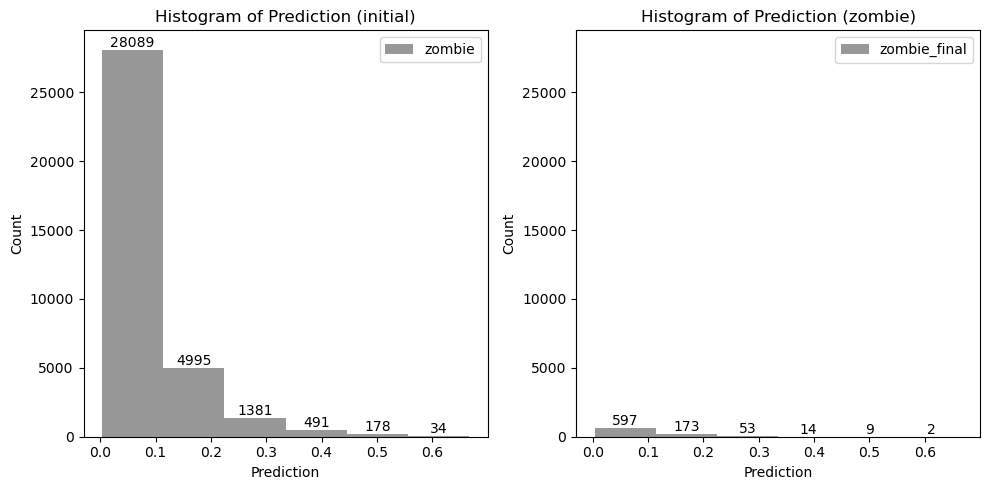

In [137]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the range of values from both datasets
min_value = min(df['prediction'].min(), zombie_final['prediction'].min())
max_value = max(df['prediction'].max(), zombie_final['prediction'].max())

# Calculate the number of bins based on the desired bin size
bin_size = 0.1
num_bins = int((max_value - min_value) / bin_size)

# Plotting histogram for 'zombie' in the first subplot
axs[0].hist(df['prediction'],  bins=num_bins, range=(min_value, max_value), alpha=0.5, label='zombie', color = '#333333')
axs[0].set_xlabel('Prediction')
axs[0].set_ylabel('Count')
axs[0].set_title('Histogram of Prediction (initial)')
axs[0].legend()

# Annotating each bar with its value in the first subplot
for rect in axs[0].patches:
    axs[0].annotate(f"{rect.get_height():.0f}", (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                    ha='center', va='bottom')

# Plotting histogram for 'zombie_final' in the second subplot
axs[1].hist(zombie_final['prediction'],  bins=num_bins, range=(min_value, max_value), alpha=0.5, label='zombie_final', color = '#333333')
axs[1].set_xlabel('Prediction')
axs[1].set_ylabel('Count')
axs[1].set_title('Histogram of Prediction (zombie)')
axs[1].legend()

# Annotating each bar with its value in the second subplot
for rect in axs[1].patches:
    axs[1].annotate(f"{rect.get_height():.0f}", (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                    ha='center', va='bottom')

# Set the y-axis limits to be the same for both subplots
max_count = max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])
axs[0].set_ylim(0, max_count)
axs[1].set_ylim(0, max_count)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [41]:
zombie_final.to_csv(path+'zombie_a1234_crunchbase.csv')

In [123]:
zombie_final['zombie'] = True

C:\Users\AshleyNguyen\AppData\Local\Temp\ipykernel_20680\2990102578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zombie_final['zombie'] = True


In [124]:
df = df.merge(zombie_final[['CompanyName','zombie']], on= 'CompanyName', how='outer')

In [125]:
df.columns

Index(['Unnamed: 0', 'prediction', 'InActive', 'LastFundingDate',
       'LastFundingNo', 'TotalFunding', 'LastFundingAmount', 'CompanyName',
       'Website', 'Description', 'CompanyOwnership', 'Industry Level 1',
       'Industry Level 2', 'Industry Level 3', 'Problem', 'Note',
       'NewDomain_x', 'NewDomain_y', 'InActive_A1', 'InActive_A2', 'keyword',
       'average', 'InActive_A3', 'NewDomain', 'NewWebsite', 'InActive_A4',
       'CutOff', 'GGTrends_CutOff', 'zombie_x', 'City', 'Country',
       'FoundationYear', 'LastFundingPeriod', 'FoundationPeriod',
       'MonthsSinceFoundation', 'MonthlyBurnRate', 'MonthsSinceLastFunding',
       'RemainingCash', 'zombie_y'],
      dtype='object')

In [126]:
df = df.drop(['zombie_x'],axis=1)
df.rename(columns={'zombie_y': 'zombie'}, inplace=True)


In [127]:
df['zombie'].fillna(False, inplace=True)
df['zombie'].value_counts()

False    34439
True       849
Name: zombie, dtype: int64

In [128]:
df.to_csv(path+'zombie_companies_v2.csv')

##### b. Tax website

In [260]:
path = r'C:\Users\AshleyNguyen\Desktop\script\\'
tax = pd.read_csv(path+'tax_scraping.csv')

In [261]:
main = zombie_final.merge(tax, on = 'CompanyName', how='inner')

In [262]:
main[main['NumResult'] < 5]

,prediction,InActive,LastFundingDate,LastFundingNo,TotalFunding,LastFundingAmount,CompanyName,Website,Description_x,CompanyOwnership,...,Formed In,Entity Type,NumResult,Inactive Date,Foreign Name,Principal Address,Mailing Address,Filing Type,Status,Term of Duration
0,0.515617,False,2015-06-08,3.0,8.190000,0.150000,MobSoc Media,www.mobsocmedia.com,Developer of social applications for creating ...,NaN,...,CALIFORNIA,Limited Liability Company - CA,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.465889,False,2007-09-05,1.0,9.460000,9.460000,Vivaty,www.vivaty.com,Developer of 3D social games and application p...,NaN,...,DELAWARE,NaN,1,08/31/2010,NaN,NaN,NaN,NaN,NaN,NaN
2,0.463630,False,2001-04-01,1.0,8.000000,8.000000,oneREV,www.onerev.com,Developer of supply management software. The c...,NaN,...,DELAWARE,NaN,1,06/09/2005,NaN,NaN,NaN,NaN,NaN,NaN
3,0.402033,False,2015-05-19,2.0,10.000000,7.000000,Detour.com,www.detour.com,Provider of an audible tour content platform o...,NaN,...,DELAWARE,NaN,1,07/02/2019,NaN,NaN,NaN,NaN,NaN,NaN
4,0.328162,False,2010-08-04,2.0,5.000000,2.000000,Peregrine Glove,www.peregrineglove.com,Manufacturer of VR glove intended for training...,NaN,...,CALIFORNIA,NaN,3,08/16/2010,NaN,NaN,NaN,NaN,NaN,NaN
12,0.182120,False,2015-09-22,2.0,12.490000,7.360000,Heighten Software,www.heighten.com,Developer of sales process tracking and pipeli...,NaN,...,DELAWARE,NaN,2,03/19/2018,NaN,NaN,NaN,NaN,NaN,NaN
13,0.175609,False,2017-11-21,1.0,13.200000,13.200000,SERES,www.driveseres.com,Operator of an automotive engineering company ...,Privately Held (backing),...,CALIFORNIA,Limited Liability Company - CA,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0.175391,False,2015-09-07,3.0,5.300000,5.300000,Arx Pax,www.arxpax.com,Developer of foundation systems designed to pr...,NaN,...,DELAWARE,Limited Liability Company - Out of State,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0.173712,False,2007-11-16,2.0,8.000000,8.000000,M2E Power,www.m2epower.com,Developer of batteries to generate and store p...,NaN,...,DELAWARE,NaN,1,NaN,"M2E POWER, INC.","C/O HIGHWAY 12 VENTURES 802 W. BANNOCK, 7TH FL...",NaN,Foreign Business Corporation,Inactive-Withdrawn,Perpetual
19,0.157645,False,2012-11-01,1.0,6.980000,6.980000,Metanautix,www.metanautix.com,Provider of big data analytics software. The c...,NaN,...,DELAWARE,NaN,1,10/31/2017,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
main[main['NumResult'] < 5]['Inactive Date'].isna().sum()

11

##### c. LinkedIn

In [138]:
import gzip
import shutil

def unzip_gz_file(input_file_path, output_file_path):
    with gzip.open(input_file_path, 'rb') as f_in:
        with open(output_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Example usage:
input_file_path = r'C:\Users\AshleyNguyen\Desktop\script\linkedin\member.csv.gz'  # Replace with the path to your .gz file
output_file_path = r'C:\Users\AshleyNguyen\Desktop\script\linkedin\member.csv'  # Replace with the desired output file path

unzip_gz_file(input_file_path, output_file_path)

In [140]:
member = pd.read_csv(r'C:\Users\AshleyNguyen\Desktop\script\linkedin\member.csv',header=None)
member

C:\Users\AshleyNguyen\AppData\Local\Temp\ipykernel_20680\1200919929.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  member = pd.read_csv(r'C:\Users\AshleyNguyen\Desktop\script\linkedin\member.csv',header=None)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2898,อัศวิน สุดใจ,NaN,NaN,noom at noom,https://www.linkedin.com/in/%e0%b8%ad%e0%b8%b1...,e5830d288370984b0845f7474c5f2318,Taiwan,Accounting,NaN,...,Taiwan,0,1,1581196477,%e0%b8%ad%e0%b8%b1%e0%b8%a8%e0%b8%a7%e0%b8%b4%...,73ad29255049bfe5fdb56d2747c40514,https://tw.linkedin.com/in/%e0%b8%ad%e0%b8%b1%...,20f8bfb1cda1c85085dc201a773470a5,%e0%b8%ad%e0%b8%b1%e0%b8%a8%e0%b8%a7%e0%b8%b4%...,73ad29255049bfe5fdb56d2747c40514
1,3970,★Daniel Schell,★Daniel,Schell,Senior QA Engineer - ISTQB - MCP,https://www.linkedin.com/in/danielalbertoschell,f6e41eed4ae136cd7ae0d8062715bc9d,Argentina,Internet,QA Senior with 10 years of experience working ...,...,Argentina,65535,14,1672338254,danielalbertoschell,bb697fcd08fd0e306879c8700202aa11,https://ar.linkedin.com/in/danielalbertoschell,9d7b4547a44495bbf4fcb1301d777f2b,danielalbertoschell,bb697fcd08fd0e306879c8700202aa11
2,15123,Rudy Knaflic,NaN,NaN,Remote Silicon Valley Sourcer / hiring remote ...,https://www.linkedin.com/in/rudyknaflic,45f33ee6f4e1a613b04525ffe19dd5eb,"Milwaukee, Wisconsin, United States",Human Resources,I enjoy learning about what people want to do ...,...,United States,65535,5,1667931831,rudyknaflic,4e3463793d6e63a0f2a1a0cb3ce872b7,https://www.linkedin.com/in/rudyknaflic,45f33ee6f4e1a613b04525ffe19dd5eb,rudyknaflic,4e3463793d6e63a0f2a1a0cb3ce872b7
3,15681,◇ Noel Witcosky,NaN,NaN,VP of Marketing at Miku,https://www.linkedin.com/in/%e2%97%87-noel-wit...,9ebcfd61cd6e62ed5498ef97a4c0be1f,"Los Angeles, California, United States",Consumer Electronics,NaN,...,United States,65535,18,1668860417,%e2%97%87-noel-witcosky-00078096,9cc75e191baa752f1ce05db96a73b4a1,https://www.linkedin.com/in/%e2%97%87-noel-wit...,9ebcfd61cd6e62ed5498ef97a4c0be1f,%e2%97%87-noel-witcosky-00078096,9cc75e191baa752f1ce05db96a73b4a1
4,17626,Preston Ito,Preston,Ito,Account Executive,https://www.linkedin.com/in/prestonito,15fc89ecf1164750f7f37f589f9470ef,"Denver, Colorado, United States",Information Technology & Services,NaN,...,United States,65535,7,1672640205,prestonito,7122b9138fd93634483b211a2c7748d2,https://www.linkedin.com/in/prestonito,15fc89ecf1164750f7f37f589f9470ef,prestonito,7122b9138fd93634483b211a2c7748d2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513724,631791175,Christine Carver,Christine,Carver,Event Marketing Manager at Guild Education,https://www.linkedin.com/in/christine-carrera,bb884455dba1b2c69cb7cec9838a420f,"Denver, Colorado, United States",NaN,Performance Marketer | Events Marketing Lead |...,...,United States,65535,5,1677541023,christine-carrera,36b3b77abb62b3a4201a02458a643bd7,https://www.linkedin.com/in/christine-carrera,bb884455dba1b2c69cb7cec9838a420f,christine-carrera,36b3b77abb62b3a4201a02458a643bd7
513725,631793470,Priyanka D,Priyanka,D,Python Developer at Thentia.com,https://www.linkedin.com/in/priyankakapy,cb5e55c929af8b64be3556eb40105a24,"Charlotte, North Carolina, United States",NaN,"More than 7 years of experience in analysis, d...",...,United States,159,3,1677757015,priyankakapy,525289f3f8a159f145dab1aa2fa63136,https://www.linkedin.com/in/priyankakapy,cb5e55c929af8b64be3556eb40105a24,priyankakapy,525289f3f8a159f145dab1aa2fa63136
513726,631793928,Vandan Kothari,Vandan,Kothari,NoBroker | Urban Company | Management Consulti...,https://www.linkedin.com/in/vandankothari,550f8d780a5c2621743fa891f2d7ef70,"Bengaluru, Karnataka, India",NaN,Experienced professional who loves to solve ch...,...,India,65535,6,1677784877,vandankothari,f53652da867c2149fbbbd8fcc6909a4b,https://in.linkedin.com/in/vandankothari1506,3e5477a3e832521847ef255e1741fc6f,vandankothari1506,6717c4a469052ac613a992fe1b92473d
513727,631794866,Dayananda A S,Dayananda,A S,Store Manager/Optometrist at Lenskart.com,https://www.linkedin.com/in/dayananda-a-s-4996...,3513905e30b7aabe5522ed46339aaec0,"Bengaluru, Karnataka, India",NaN,NaN,...,India,0,2,1677827306,dayananda-a-s-49969a235,fafa6f7f05cb13b053d3362059f84e22,https://in.linke

In [139]:
linkedin = pd.read_csv(r'C:\Users\AshleyNguyen\Desktop\script\linkedin\member_experience.csv',header=None)
linkedin

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2157,2898,noom,NaN,noom,https://www.linkedin.com/company/noom,NaN,NaN,NaN,NaN,2016-07-22 14:28:37,2018-09-22 18:17:09,1,NaN,4833749.0
1,1234804847,2898,noom,NaN,noom,https://ph.linkedin.com/company/noom,NaN,NaN,NaN,NaN,2018-09-22 18:17:10,2019-06-17 09:29:24,1,NaN,4833749.0
2,1830908310,2898,noom,NaN,noom,https://www.linkedin.com/company/noom,NaN,NaN,NaN,NaN,2019-06-17 09:29:24,2020-02-08 21:14:37,0,1.0,4833749.0
3,2950,3970,QA Senior - Automation,Argentina,Making Sense,https://www.linkedin.com/company/making-sense-llc,April 2014,NaN,NaN,"<p class=""description"" data-section=""currentPo...",2016-07-22 14:29:32,2018-03-30 15:09:21,1,NaN,5269782.0
4,2951,3970,QA Analyst & QA Automation,NaN,ARRIS,https://www.linkedin.com/company/arris,September 2012,February 2014,1 year 6 months,"<p class=""description"" data-section=""pastPosit...",2016-07-22 14:29:32,2018-03-30 15:09:21,1,NaN,8745402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140598,3310320688,631794866,Store Manager/Optometrist,NaN,Lenskart.com,https://al.linkedin.com/company/lenskart-com,NaN,NaN,NaN,NaN,2023-03-03 07:08:26,2023-03-03 07:08:26,0,2.0,33700116.0
17140599,3310394143,631795079,Front-End Engineer,NaN,Exponent,https://pl.linkedin.com/company/exponent,February 2019,October 2022,3 years 9 months,NaN,2023-03-03 10:10:04,2023-03-03 10:10:04,0,1.0,6182817.0
17140600,3310394144,631795079,Digital Marketing Executive,NaN,BambooHR,https://pl.linkedin.com/company/bamboohr,July 2016,December 2018,2 years 6 months,NaN,2023-03-03 10:10:04,2023-03-03 10:10:04,0,2.0,483993.0
17140601,3310394145,631795079,Digital Marketing Innovation Lead,NaN,Stripe,https://pl.linkedin.com/company/stripe,July 2015,June 2016,1 year,NaN,2023-03-03 10:10:04,2023-03-03 10:10:04,0,3.0,4744382.0


In [143]:
merged_df_test.columns

Index(['Unnamed: 0_x', 'prediction', 'InActive', 'LastFundingDate',
       'LastFundingNo', 'TotalFunding', 'LastFundingAmount', 'CompanyName',
       'Website', 'Description_x', 'CompanyOwnership', 'Industry Level 1',
       'Industry Level 2', 'Industry Level 3', 'Problem', 'Note',
       'NewDomain_x', 'NewDomain_y', 'InActive_A1', 'InActive_A2', 'keyword',
       'average', 'InActive_A3', 'NewDomain', 'NewWebsite', 'InActive_A4',
       'CutOff', 'GGTrends_CutOff', 'zombie', 'City', 'Country',
       'FoundationYear', 'LastFundingPeriod', 'FoundationPeriod',
       'MonthsSinceFoundation', 'MonthlyBurnRate', 'MonthsSinceLastFunding',
       'RemainingCash', 'Unnamed: 0_y', 'Organization Name', 'Industries',
       'Headquarters Location', 'Description_y', 'CB Rank (Company)',
       'Monthly Visits', 'Operating Status', 'Closed Date', 'Twitter',
       'LinkedIn', 'Founders', 'Acquisition Status', 'Acquired by'],
      dtype='object')

In [144]:
merged_df_test['Founders']

0                     Antoine Leveque, Guillaume Multrier
1                                                     NaN
2                         Justin Smithline, Peter Brodsky
3                                                     NaN
4       Brad Moss, Charles Ju, Eric Liaw, Eric Peng, H...
                              ...                        
1490                                                  NaN
1491                                                  NaN
1492                             Jim Walborn, Lance Healy
1493                                                  NaN
1494                Asaf Peled, Gilad Beiman, Yuval Larom
Name: Founders, Length: 1495, dtype: object

In [151]:
founders_column = merged_df_test['Founders']
member_names = member[1]

# Iterate over each row in the 'Founders' column
for row in founders_column:
    if isinstance(row, str):
        # Extract names from the row
        names = row.split(",")
        column_names = [name.strip() for name in names]

        # Check if any name appears in member['1']
        for name in column_names:
            if name in member_names:
                print(f"'{name}' appears in member[1]")